<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/ir-basic/word2vec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 네이버 영화리뷰 한국어 word2vec 만들기

In [3]:
pip install konlpy

     |████████████████████████████████| 19.4MB 187kB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 460kB 44.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

#### 데이터 텍스트 파일 불러오기

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f853f7e54a8>)

In [6]:
#pd.read_table : Read general delimited file into DataFrame.
train_data = pd.read_table("ratings.txt")

In [7]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


#### 전처리 하기

In [8]:
len(train_data)

200000

In [9]:
#any(): 하나라도 true인지 확인
train_data.isnull().values.any() 

True

In [10]:
# Null 값 존재 행 제거 (any: 하나라도 존재하면 삭제 all : 전체가 Na여야 삭제)
train_data = train_data.dropna(how = 'any')
print(train_data.isnull().values.any())

False


In [11]:
# 8개가 줄었음
len(train_data)

199992

In [12]:
# 정규 표현식을 통해 한글 외의 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")

In [13]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [14]:
# 형태소 분석기 OKT를 사용한 토근화 작업(다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document'] : 
  temp_X = okt.morphs(sentence, stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_X)

리뷰의 최대 길이:  68
리뷰의 평균 길이:  10.669446777871116


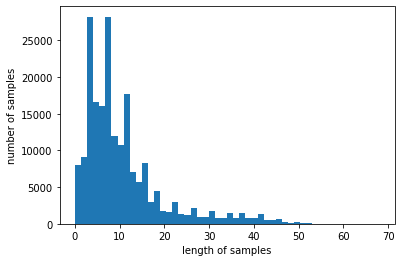

In [17]:
#리뷰 길이 분포 확인
print('리뷰의 최대 길이: ',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이: ',sum(map(len, tokenized_data))/len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [20]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17947, 100)

In [25]:
print(model.wv.most_similar("재미"))

[('스릴', 0.6567195653915405), ('감흥', 0.6463266611099243), ('잼', 0.6142027378082275), ('흥미', 0.5893304347991943), ('맛', 0.5865706205368042), ('긴장감', 0.583344042301178), ('임팩트', 0.5821045637130737), ('윈', 0.5573553442955017), ('별거', 0.5441567301750183), ('멋', 0.5416509509086609)]


In [26]:
print(model.wv.most_similar("히어로"))

[('블록버스터', 0.8819597959518433), ('느와르', 0.8591264486312866), ('호러', 0.8566254377365112), ('물', 0.8393632173538208), ('멜로', 0.8391906023025513), ('무협', 0.8346466422080994), ('홍콩', 0.8307685852050781), ('무비', 0.8292303085327148), ('슬래셔', 0.8196389675140381), ('헐리우드', 0.8010222315788269)]


In [44]:
# ~~다가 아니면 단어가 없다는데... 리뷰만 보는게 아닌가? 리뷰를 자기가 기본 문법으로 만드나?
print(model.wv.most_similar("재밌어"))

KeyError: ignored